# Time average in Z-coordinate

MITgcm channel simulation output from all the tracers and other model variables was saved as 6month averages online. These averages were on the model grid, which is a Z-grid. 

Here we take this output and further average it to create a 15year time averaged variables.

The notebook will save these 15year averages as separate files. 

In [1]:
# load modules 

import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline

### Online averages

In [2]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored/'

model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave','UUtave', 'UVtave', 'VVtave', 'TTtave', 'ETAtave']
ds_model = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

In [3]:
model_vars = ['tracer1_diag', 'tracer2_diag', 'tracer3_diag', 'tracer4_diag', 'tracer5_diag',
              'tracer6_diag', 'tracer7_diag', 'tracer8_diag', 'tracer9_diag', 'tracer10_diag',
              'tracer11_diag', 'tracer12_diag', 'tracer13_diag', 'tracer14_diag', 'tracer15_diag',
              'tracer16_diag', 'tracer17_diag', 'tracer18_diag', 'tracer19_diag', 'tracer20_diag',]
ds_tracers = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

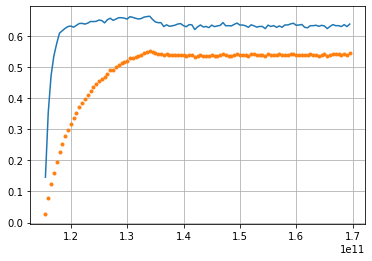

In [4]:
# Here we show that the two tracers (1year and 6 year) take different times to equilibrate. 
plt.plot(ds_tracers.time/24/3600/360, ds_tracers.TRAC01.sel(XC=slice(0, 400e3), YC=slice(800e3,1200e33)).mean(['XC', 'YC']).sel(Z=-1000, method='nearest'))
plt.plot(ds_tracers.time/24/3600/360, ds_tracers.TRAC02.sel(XC=slice(0, 400e3), YC=slice(800e3,1200e33)).mean(['XC', 'YC']).sel(Z=-1000, method='nearest'),'.')
plt.grid()

In [5]:
ds_tracers.time.values/24./3600/360/1.e9

array([115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121,
       122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128,
       128, 129, 129, 130, 130, 131, 131, 132, 132, 133, 133, 134, 134,
       135, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 140, 141,
       141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147,
       148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154,
       154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160,
       161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167,
       167, 168, 168, 169, 169], dtype='timedelta64[ns]')

In [6]:
ds_tracers.time[68:110]/24./3600/360/1.e9 # only select last 20 years

<xarray.DataArray 'time' (time: 41)>
array([149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155,
       156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162,
       162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168,
       169, 169], dtype='timedelta64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 53820 days 54000 days ... 61020 days

In [7]:
# cut out last 20 years of data
Model_Tav = ds_model.isel(time=slice(68,110)).mean('time')
Trac_Tav = ds_tracers.isel(time=slice(68,110)).mean('time')

Note that below here we are saving the variables on the model grid. This is different from the TWA, where interpolated to center point before saving averages.

In [8]:
%%time 
Model_Tav.load();
Model_Tav.to_netcdf('analysis_data_files/ZA_model_Tav_online.nc')

CPU times: user 54.7 s, sys: 27.5 s, total: 1min 22s
Wall time: 23.6 s


In [9]:
%%time 
Trac_Tav.load();
Trac_Tav.to_netcdf('analysis_data_files/ZA_Trac_Tav_online.nc')

CPU times: user 11min 18s, sys: 3min 40s, total: 14min 59s
Wall time: 10min 57s


### Offline averages

In [12]:
ds_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored/'
ds_offline = xr.open_zarr('/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/')

In [13]:
from xgcm import Grid
grid = Grid(ds_offline, periodic='X')

... 
Make the fluxes etc on the native grid, a dataset that looks the same as Trac_Tav and Model_Tav